# Calcul et analyse de la vitesse du son dans le cristal Ba<sub>2</sub>BiAu

## Imports 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from tabulate import tabulate
from pymatgen.phonon.plotter import PhononBSPlotter

## Téléchargement du fichier : 

In [3]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
with MPRester("bfWHOpdayyP1LUqo") as m:

    # Structure for material id
    bandstructure = m.get_phonon_bandstructure_by_material_id("mp-862947")

## Structure des bandes de phonons : 

Nous pouvons observer un graphe de la relation de dispersion des phonons dans notre matériau. 
Pour déterminer la vitesse du son, nous allons devoir déterminer les branches acoustiques dans les différentes directions de la zone de Brillouin.
Ces branches acoustiques seront les lieux où la longueur d'onde est la plus grande (donc où la valeur de $k$ est la plus proche de $0$). Ces branches correspondent aux chemins $\Gamma - X$, $K - \Gamma$ et $\Gamma - L$.

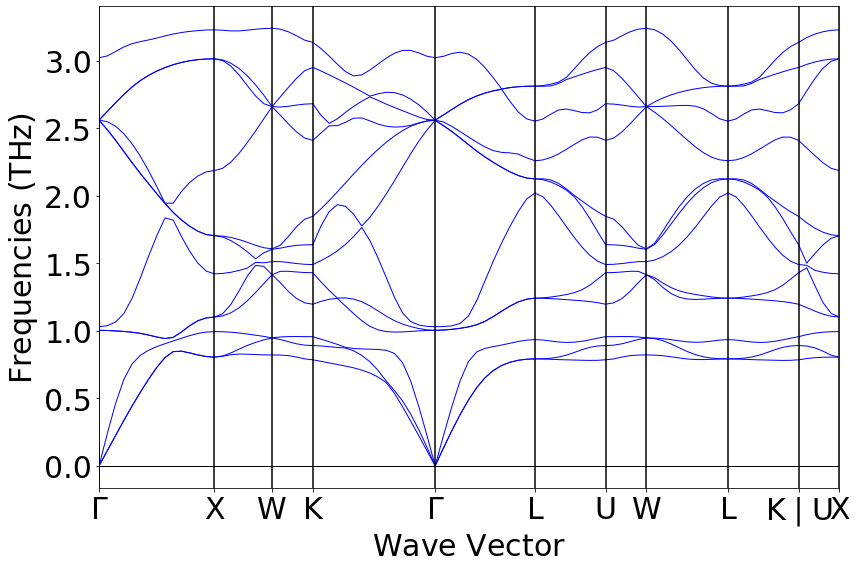

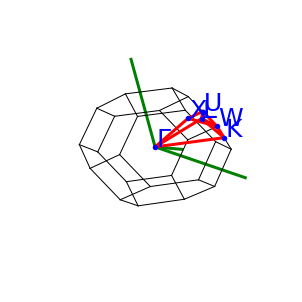

Voici la zone de brillouin où nous allons étudier les phonons


In [4]:
plot = PhononBSPlotter(bandstructure)
plot.get_plot()
plot.plot_brillouin()
print("Voici la zone de brillouin où nous allons étudier les phonons")

## Initialisation des données : 

In [5]:
data = plot.bs_plot_data()
distance = data.get("ticks").get("distance")
distances = data.get("distances")
frequency = data.get("frequency")
lattice = data.get("lattice")

## Analyse de la vitesse du son : 

Approximation de la vitesse du son par une approximation linéaire pour de petits k :  205.744 [m/s]
Approximation de la vitesse du son par une approximation linéaire pour de petits k :  205.623 [m/s]
Approximation de la vitesse du son par une approximation linéaire pour de petits k :  239.214 [m/s]


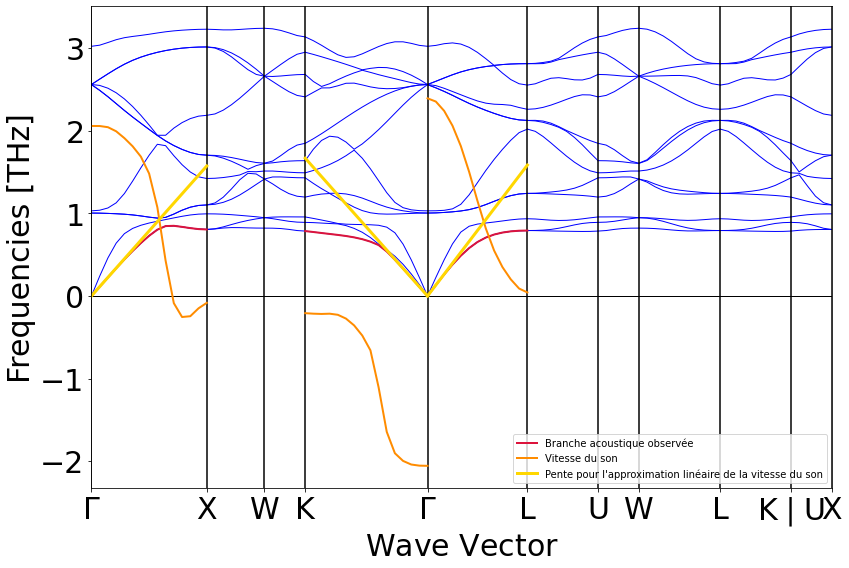

In [53]:
frequencies = [0,0,0]
frequencies[0] = frequency[0][0]
frequencies[1] = frequency[3][0]
frequencies[2] = frequency[4][0]

k_d = [0,0,0]
k_d[0] = distances[0]
k_d[1] = distances[3]
k_d[2] = distances[4]

deriv = [0,0,0]
dwdx = [0,0,0]
son = [0,0,0] 

for i in range(3) : 
    
    if i == 1 : 
        deriv[i] = np.gradient(frequencies[i], k_d[i][1]-k_d[i][0])
        dwdx[i] = np.add(np.multiply(np.array(k_d[i]), np.array(deriv[i][-1])), 
                     np.add(-np.multiply(np.array(k_d[i][-1]), np.array(deriv[i][-1])), np.array(
                         frequencies[i][-1])))
        son[i] = np.abs(((dwdx[i][-1]-dwdx[i][0])*10**12)/((k_d[i][-1]-k_d[i][0])*10**10))
    else : 
        deriv[i] = np.gradient(frequencies[i], k_d[i][1]-k_d[i][0])
        dwdx[i] = np.add(np.multiply(np.array(k_d[i]), np.array(deriv[i][0])), 
                         np.add(-np.multiply(np.array(k_d[i][0]), np.array(deriv[i][0])), np.array(
                             frequencies[i][0])))
        son[i] = np.abs(((dwdx[i][1]-dwdx[i][0])*10**12)/((k_d[i][1]-k_d[i][0])*10**10))

plot.get_plot()

for i in range(3):
    
    if i == 0 : 
        plt.plot(k_d[i], frequencies[i], color= "crimson", linewidth = 2, label = "Branche acoustique observée")
        plt.plot(k_d[i], deriv[i], color= "darkorange", linewidth = 2, label = "Vitesse du son")
        plt.plot(k_d[i], dwdx[i], color="gold", linewidth = 3, label = "Pente pour l'approximation linéaire de la vitesse du son")
    else : 
        plt.plot(k_d[i], frequencies[i], linewidth = 2, color= "crimson")
        plt.plot(k_d[i], deriv[i], linewidth = 2, color= "darkorange")
        plt.plot(k_d[i], dwdx[i], linewidth = 3, color="gold")
    print("Approximation de la vitesse du son par une approximation linéaire pour de petits k : ", round(son[i],3), "[m/s]")
plt.ylabel("Frequencies [THz]")
plt.legend()
plt.show()